In [ ]:
!pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 10.2 MB/s 


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model, Sequential
from tensorflow.keras.layers import Dense, Input

from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from mtcnn.mtcnn import MTCNN
import cv2
from skimage import io
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
%cd '/content/gdrive/My Drive/LDS8_K275_ONLINE_DinhVietTrung'

Mounted at /content/gdrive
/content/gdrive/My Drive/LDS8_K275_ONLINE_DinhVietTrung


In [ ]:
%cd 'Chapter_9_Face_Detection'

/content/gdrive/MyDrive/LDS8_K275_ONLINE_DinhVietTrung/Chapter_9_Face_Detection


In [ ]:
print(tf.__version__)
print(keras.__version__)

2.8.2
2.8.0


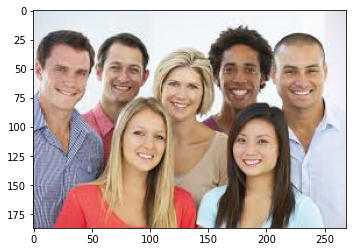

In [ ]:
image = io.imread('FaceDetection/group_of_people.jpg')
plt.imshow(image)

In [ ]:
# result show lên những người trong hình, theo thứ tự alpha beta ...

detector = MTCNN()
result = detector.detect_faces(image)
result

[{'box': [159, 31, 36, 51],
  'confidence': 0.9999665021896362,
  'keypoints': {'left_eye': (169, 51),
   'mouth_left': (167, 68),
   'mouth_right': (186, 68),
   'nose': (177, 61),
   'right_eye': (186, 51)}},
 {'box': [60, 31, 33, 47],
  'confidence': 0.9999501705169678,
  'keypoints': {'left_eye': (70, 49),
   'mouth_left': (68, 64),
   'mouth_right': (85, 66),
   'nose': (78, 60),
   'right_eye': (86, 51)}},
 {'box': [79, 89, 34, 47],
  'confidence': 0.999943733215332,
  'keypoints': {'left_eye': (91, 105),
   'mouth_left': (88, 122),
   'mouth_right': (105, 124),
   'nose': (100, 116),
   'right_eye': (108, 109)}},
 {'box': [9, 32, 38, 50],
  'confidence': 0.9998481273651123,
  'keypoints': {'left_eye': (24, 50),
   'mouth_left': (20, 67),
   'mouth_right': (37, 70),
   'nose': (32, 63),
   'right_eye': (41, 54)}},
 {'box': [112, 49, 33, 43],
  'confidence': 0.9998034834861755,
  'keypoints': {'left_eye': (121, 63),
   'mouth_left': (118, 78),
   'mouth_right': (135, 81),
   'nose

In [ ]:
bounding_box = result[0]['box']
keypoints = result[0]['keypoints']

bounding_box, keypoints

([159, 31, 36, 51],
 {'left_eye': (169, 51),
  'mouth_left': (167, 68),
  'mouth_right': (186, 68),
  'nose': (177, 61),
  'right_eye': (186, 51)})

In [ ]:
for person in result:
    bounding_box = person['box']
    keypoints = person['keypoints']
    # ve bouding box
    # (hinh, diem dau, diem cuoi, mau sac, do day duong)
    cv2.rectangle(image, # hinh 
                  (bounding_box[0], bounding_box[1]), # diem dau
                  (bounding_box[0]+bounding_box[2], 
                   bounding_box[1] + bounding_box[3]), # diem cuoi 
                  (0, 0, 255), 1) # mau sac, do day
    # ve diem dai dien cho mat, mui mieng
    # ve diem: hinh, vi tri, ban kinh, mau sac, do dam net
    cv2.circle(image,(keypoints['left_eye']), 2, (0,0,255), 1) # hinh, vi tri, ban kinh, mau sac, do dam net
    cv2.circle(image,(keypoints['right_eye']), 2, (0,0,255), 1)
    cv2.circle(image,(keypoints['nose']), 2, (0,0,255), 1) 
    cv2.circle(image,(keypoints['mouth_left']), 2, (0,0,255), 1)
    cv2.circle(image,(keypoints['mouth_right']), 2, (0,0,255), 1)


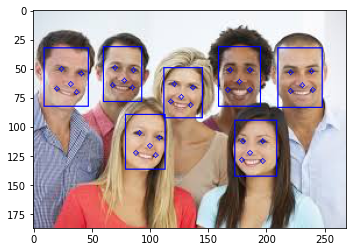

In [ ]:
plt.imshow(image)


In [ ]:
def mtcnn_detect_faces(_image):
    detector = MTCNN()
    result = detector.detect_faces(_image)
    for p in result:
        bounding_box = p['box']
        keypoints = p['keypoints']

        cv2.rectangle(_image, (bounding_box[0], bounding_box[1]),
                        (bounding_box[0] + bounding_box[2], bounding_box[1] + bounding_box[3]),
                        (255,0,0), 2)
    cv2.circle(_image, (keypoints['left_eye']), 5, (0,255,0), 10)
    cv2.circle(_image, (keypoints['right_eye']), 5, (0,255,0), 10)
    cv2.circle(_image, (keypoints['nose']), 5, (0,255,0), 10)
    cv2.circle(_image, (keypoints['mouth_left']), 5, (0,255,0), 10)
    cv2.circle(_image, (keypoints['mouth_right']), 5, (0,255,0), 10)

    return _image

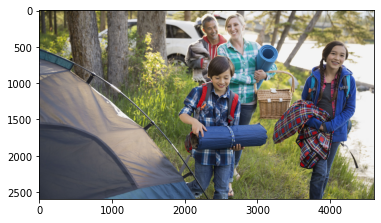

In [ ]:
img = io.imread('https://www.tripsavvy.com/thmb/_cCjdLJU3c2Igw6rLMlJFgq8gNs=/4608x2592/smart/filters:no_upscale()/Family-Camping-572133413df78c5640da472b.jpg')
plt.imshow(img)

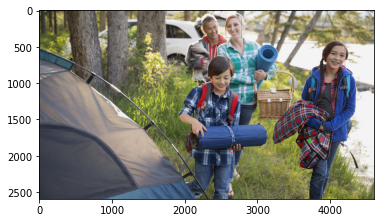

In [ ]:
mtcnn_detect_faces(img)
plt.imshow(img)